# Data Mining (Δ02): Exercise Set 2: 2.2 - 3Wings Dataset 

<br>Name: Nefeli Eleftheria Sextou</br> 
<br> Student ID: 503</br> 
<br> E-mail: pcs00503@uoi.gr, nsekstou@cs.uoi.gr</br>

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data preprocessing


#classifiers
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
data = []
# read the file line by line
with open(r'C:\Users\Nefeli\Desktop\dm_msc\DM_Homework2_2024\clustering\3wings.txt', 'r') as file:
    for line in file:
        # Strip whitespace, split (by space)
        clean_line = line.strip().split()
        data.append((float(clean_line[0]), float(clean_line[1])))

# Create DataFrame from the list
main_df = pd.DataFrame(data, columns=['x', 'y'])
#rings3

### Plot data

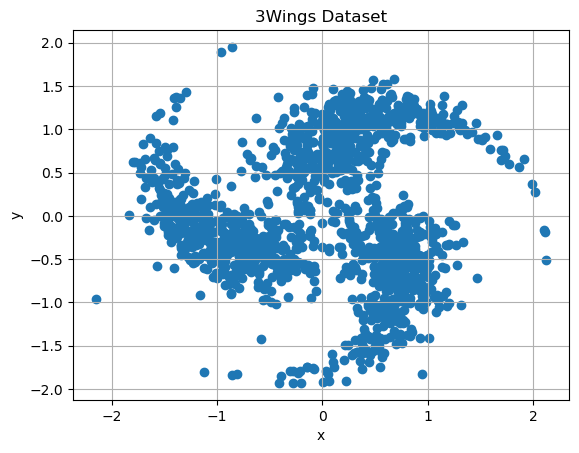

In [3]:
plt.scatter(main_df['x'], main_df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('3Wings Dataset')
plt.grid(True)
plt.show()

<b>Expected number of clusters: 3</b>

## k-means

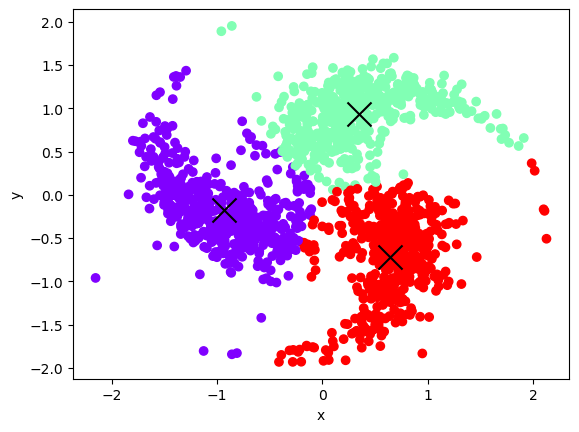

In [4]:
#init and fit
kmeans = KMeans(n_clusters=3)
kmeans.fit(main_df)

# get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Agglomerative Clustering : single link

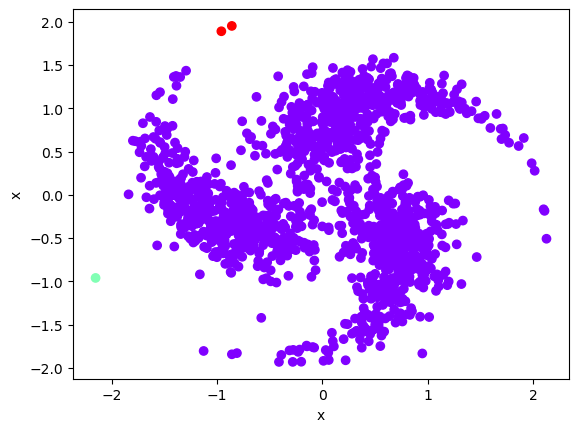

In [5]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='single')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()


## Agglomerative Clustering : average link

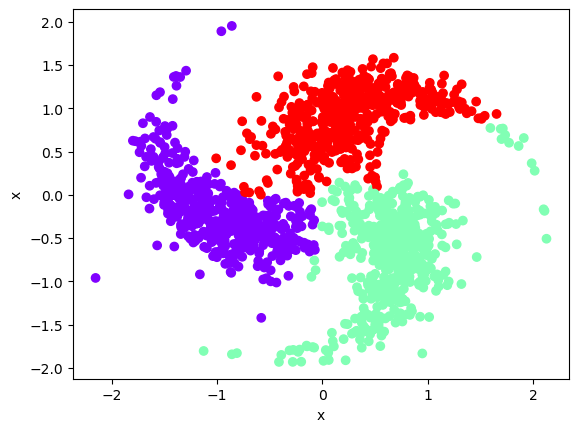

In [6]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='average')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()

## Spectral Clustering 

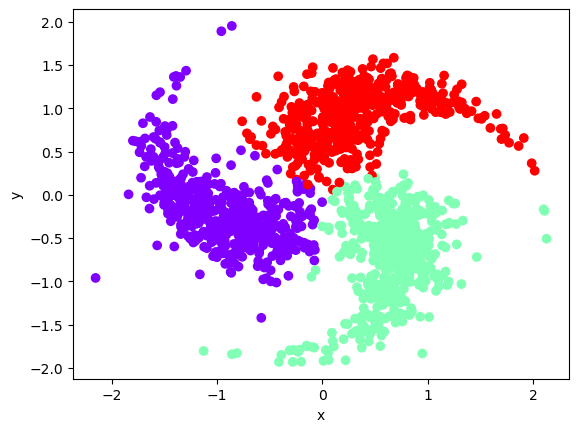

In [7]:
# perform spectral clustering
sigma = 0.5 # tried 0.1, 0.5, 1
spectral_cluster = SpectralClustering(n_clusters=3, affinity='rbf', gamma = (1/(sigma**2)), assign_labels='kmeans')
labels = spectral_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Remarks 

K-Means and Spectral Clustering for <b>sigma=0.5</b> achieve a good clustering result. Average Link Agglomerative Clustering gives a less ideal solution since it seems to classify some of points of the 'tips' red wing as green when they inuitively seem part of the red wing. Single Link Agglomerative Clustering fails to cluster well.

K- means succeeds because each cluster has a similar shape, size and variance as well as denser areas that could be defined as almost spherical.

Spectral clustering succeeds because the data structure evidently seems to be effectively described by the similarity matrix utlized internally in the method.

Average Link Agglomerative Clustering gives a less ideal solution because average linkage may not do well with the shape of the wings or density variations within the data.

Single Link Agglomerative Clustering fails because the merge criterion is local and thus may lead to a "chaining effect" which leads to a chain of points being extended for long distances and leading to bad clustering results, in this case one big cluster with the exception of two points.